In [7]:
import csv
import matplotlib.pyplot as plt


def createPerfPlot(csv_file_path: str, csv_file_name: str, title: str):
    # Lists to store data
    x_values = []
    y_values_lists = []

    # Read data from CSV file
    with open(csv_file_path + csv_file_name, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Read the header to get column names

        x_column_index = header.index('M')  # Replace 'x_column_name' with the actual column name for x-axis
        y_column_indices = []
        for i in range(1, len(header)):
            y_column_indices.append(i) 

        for i in range(len(y_column_indices)):
            y_values_lists.append([])

        for row in reader:
            # Extract x-axis values
            x_values.append(float(row[x_column_index]))

            # Extract y-axis values
            for y_index in y_column_indices:
                y_values_lists[y_index - 1].append(float(row[y_index]))        

    colors = ["blue", "green", "orange", "red", "black"]

    # Plot the data
    for i, y_values in enumerate(y_values_lists):
        plt.plot(x_values, y_values, label=header[i + 1], linestyle="-", color=colors[i])

    plt.ylabel('TFLOPS')
    plt.xlabel('Square Matrix Dimension')
    plt.title(title)

    plt.legend()

    file_name = title.lower().replace(" ", "-")
    save_path = f"{csv_file_path}{file_name}.pdf"
    plt.savefig(save_path, dpi=500, bbox_inches='tight')

    # Display the plot
    plt.show()


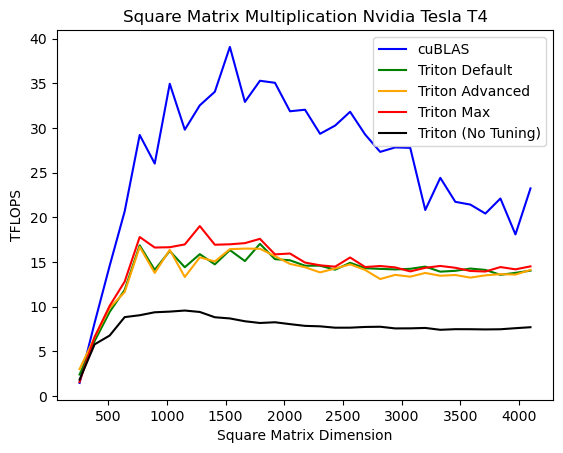

In [30]:
csv_file_path = "Triton/matmul/T4/"
csv_file_name = "restults_tesla_t4.csv"
title = "Square Matrix Multiplication Nvidia Tesla T4"

createPerfPlot(csv_file_path=csv_file_path, csv_file_name=csv_file_name, title=title)

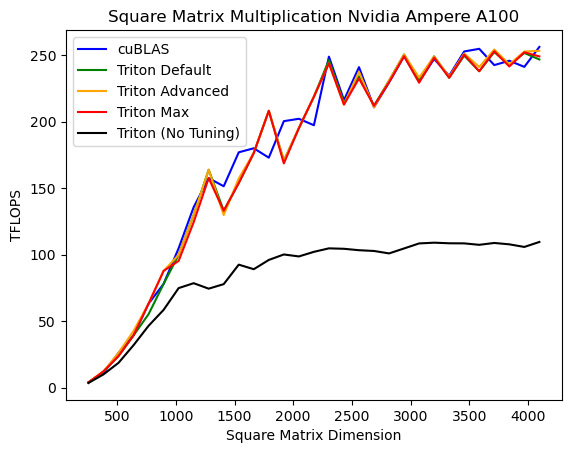

In [8]:
csv_file_path = "Triton/matmul/A100/"
csv_file_name = "results_ampere_A100.csv"
title = "Square Matrix Multiplication Nvidia Ampere A100"

createPerfPlot(csv_file_path=csv_file_path, csv_file_name=csv_file_name, title=title)

/tmp/ipykernel_4127840/3634440709.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")


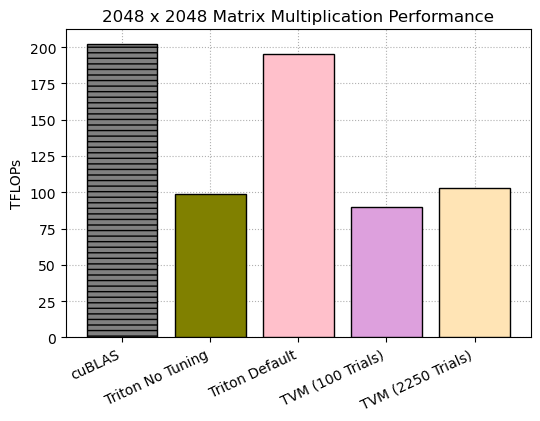

In [84]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

fig.set_size_inches(6, 4)

# Plotting the bar chart
ax.bar("cuBLAS", 202.135135, color='grey', edgecolor='black', hatch="---", zorder=3)
ax.bar("Triton No Tuning", 98.689506, color="olive", edgecolor='black', zorder=3)
ax.bar("Triton Default", 195.083907, color="pink", edgecolor='black', zorder=3)
ax.bar("TVM (100 Trials)", 89.520224, color="plum", edgecolor='black', zorder=3)
ax.bar("TVM (2250 Trials)", 102.736037, color="moccasin", edgecolor='black', zorder=3)

ax.grid(linestyle="dotted", zorder=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
ax.set_ylabel('TFLOPs')
ax.set_title("2048 x 2048 Matrix Multiplication Performance")

fig.show()
fig.savefig(fname="TVM-MetaSchedule/matmul/A100/barchart-matmul-perf.pdf", dpi=500, bbox_inches="tight")